In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import os.path
from matplotlib import pyplot

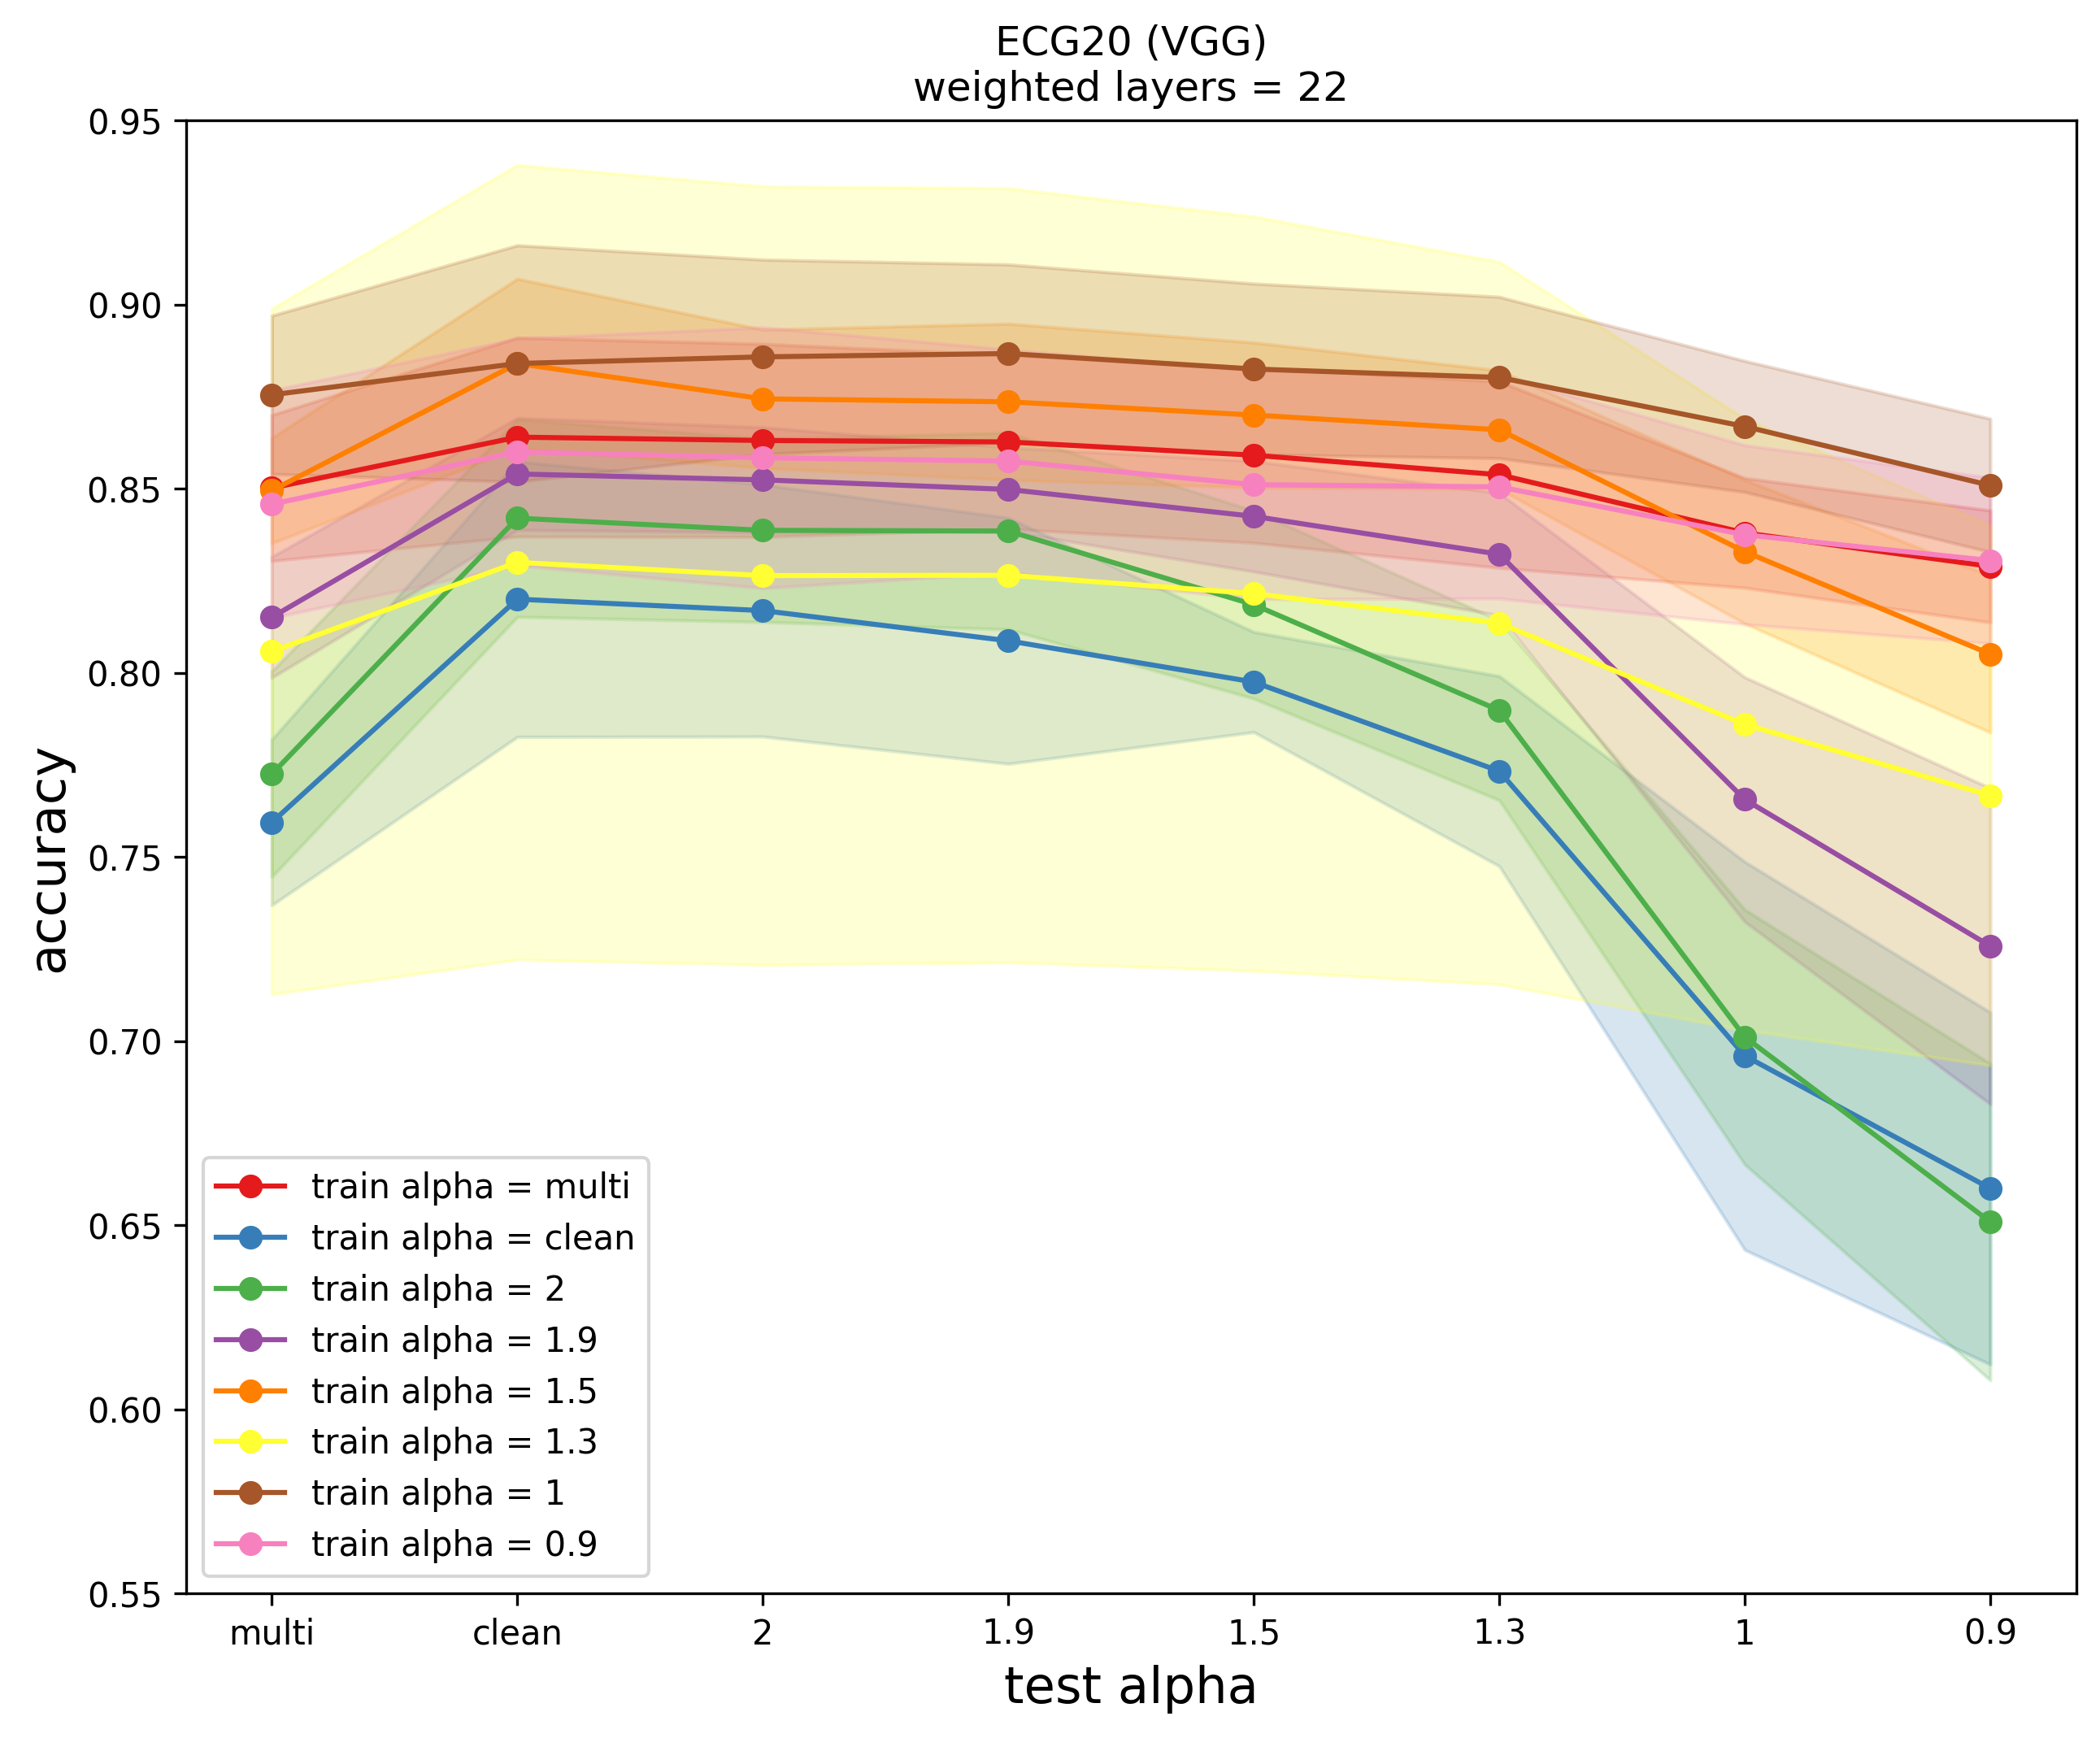

In [ ]:
# 时序信号画图
summary_acc = pd.DataFrame()
modeltype='vgg'
# num = 8
# if num < 3:
#     layer = num*2
# else:
#     layer = 2*2+(num-2)*3
# acc
# alphas = ['mix',6, 0, 2, 1.9, 1.5, 1.3, 1, 0.9]
alphas = ['mix']
# numfilter = [16,32,64,128]
numfilter = [16,32,64]
palette = pyplot.get_cmap('Set1')
plt.figure(figsize=(10, 8),dpi=300)
i=0
for alpha in alphas:
# for alpha in [1.9]:
    color=palette(i)
    acc_path = "./results/accuracy_alpha{}_model{}_numfilter{}.txt".format(alpha,modeltype,numfilter)
    # acc_path = "/home/jipeng/PycharmProjects/robustness-resnet/RepeatFive-sigma0.05/accuracy_{}.txt".format(alpha)
    if os.path.exists(acc_path) == 0:
        print('no exists, alpha={}'.format(alpha))
    else:
#         f = open(acc_path, 'rb')
#         acc = read(acc_path)
#         df = pd.DataFrame(acc)
        acc = np.loadtxt(acc_path).reshape(5,9)
        df = pd.DataFrame(acc)
        means = np.array(df.mean().round(decimals=4))
        stds = np.array(df.std().round(decimals=4))
        x = ['mixture','multi','clean','2', '1.9', '1.5', '1.3', '1', '0.9']
        if alpha == 0:
            alpha = 'clean'
        if alpha == 6:
            alpha = 'multi'
        plt.plot(x,means,'o-',color=color,label='train alpha = {}'.format(alpha))
        plt.fill_between(x, means-stds, means+stds, color=color, alpha=0.2)
        plt.ylim((0.55, 0.95))
    i=i+1

plt.xlabel("test alpha",fontsize=15)#横坐标名字
plt.ylabel("accuracy",fontsize=15)#纵坐标名字
plt.legend(loc = "best")#图例
plt.title('ECG20 (VGG13)\nweighted layers = {}'.format(layer))
plt.show()
        

/home/jipeng/PycharmProjects/robustness-resnet/resnet_numres7/accuracy_alpha6_modelresnet_numres7.txt
/home/jipeng/PycharmProjects/robustness-resnet/resnet_numres7/accuracy_alpha0_modelresnet_numres7.txt
/home/jipeng/PycharmProjects/robustness-resnet/resnet_numres7/accuracy_alpha2_modelresnet_numres7.txt
/home/jipeng/PycharmProjects/robustness-resnet/resnet_numres7/accuracy_alpha1.9_modelresnet_numres7.txt
/home/jipeng/PycharmProjects/robustness-resnet/resnet_numres7/accuracy_alpha1.5_modelresnet_numres7.txt
/home/jipeng/PycharmProjects/robustness-resnet/resnet_numres7/accuracy_alpha1.3_modelresnet_numres7.txt
/home/jipeng/PycharmProjects/robustness-resnet/resnet_numres7/accuracy_alpha1_modelresnet_numres7.txt
/home/jipeng/PycharmProjects/robustness-resnet/resnet_numres7/accuracy_alpha0.9_modelresnet_numres7.txt


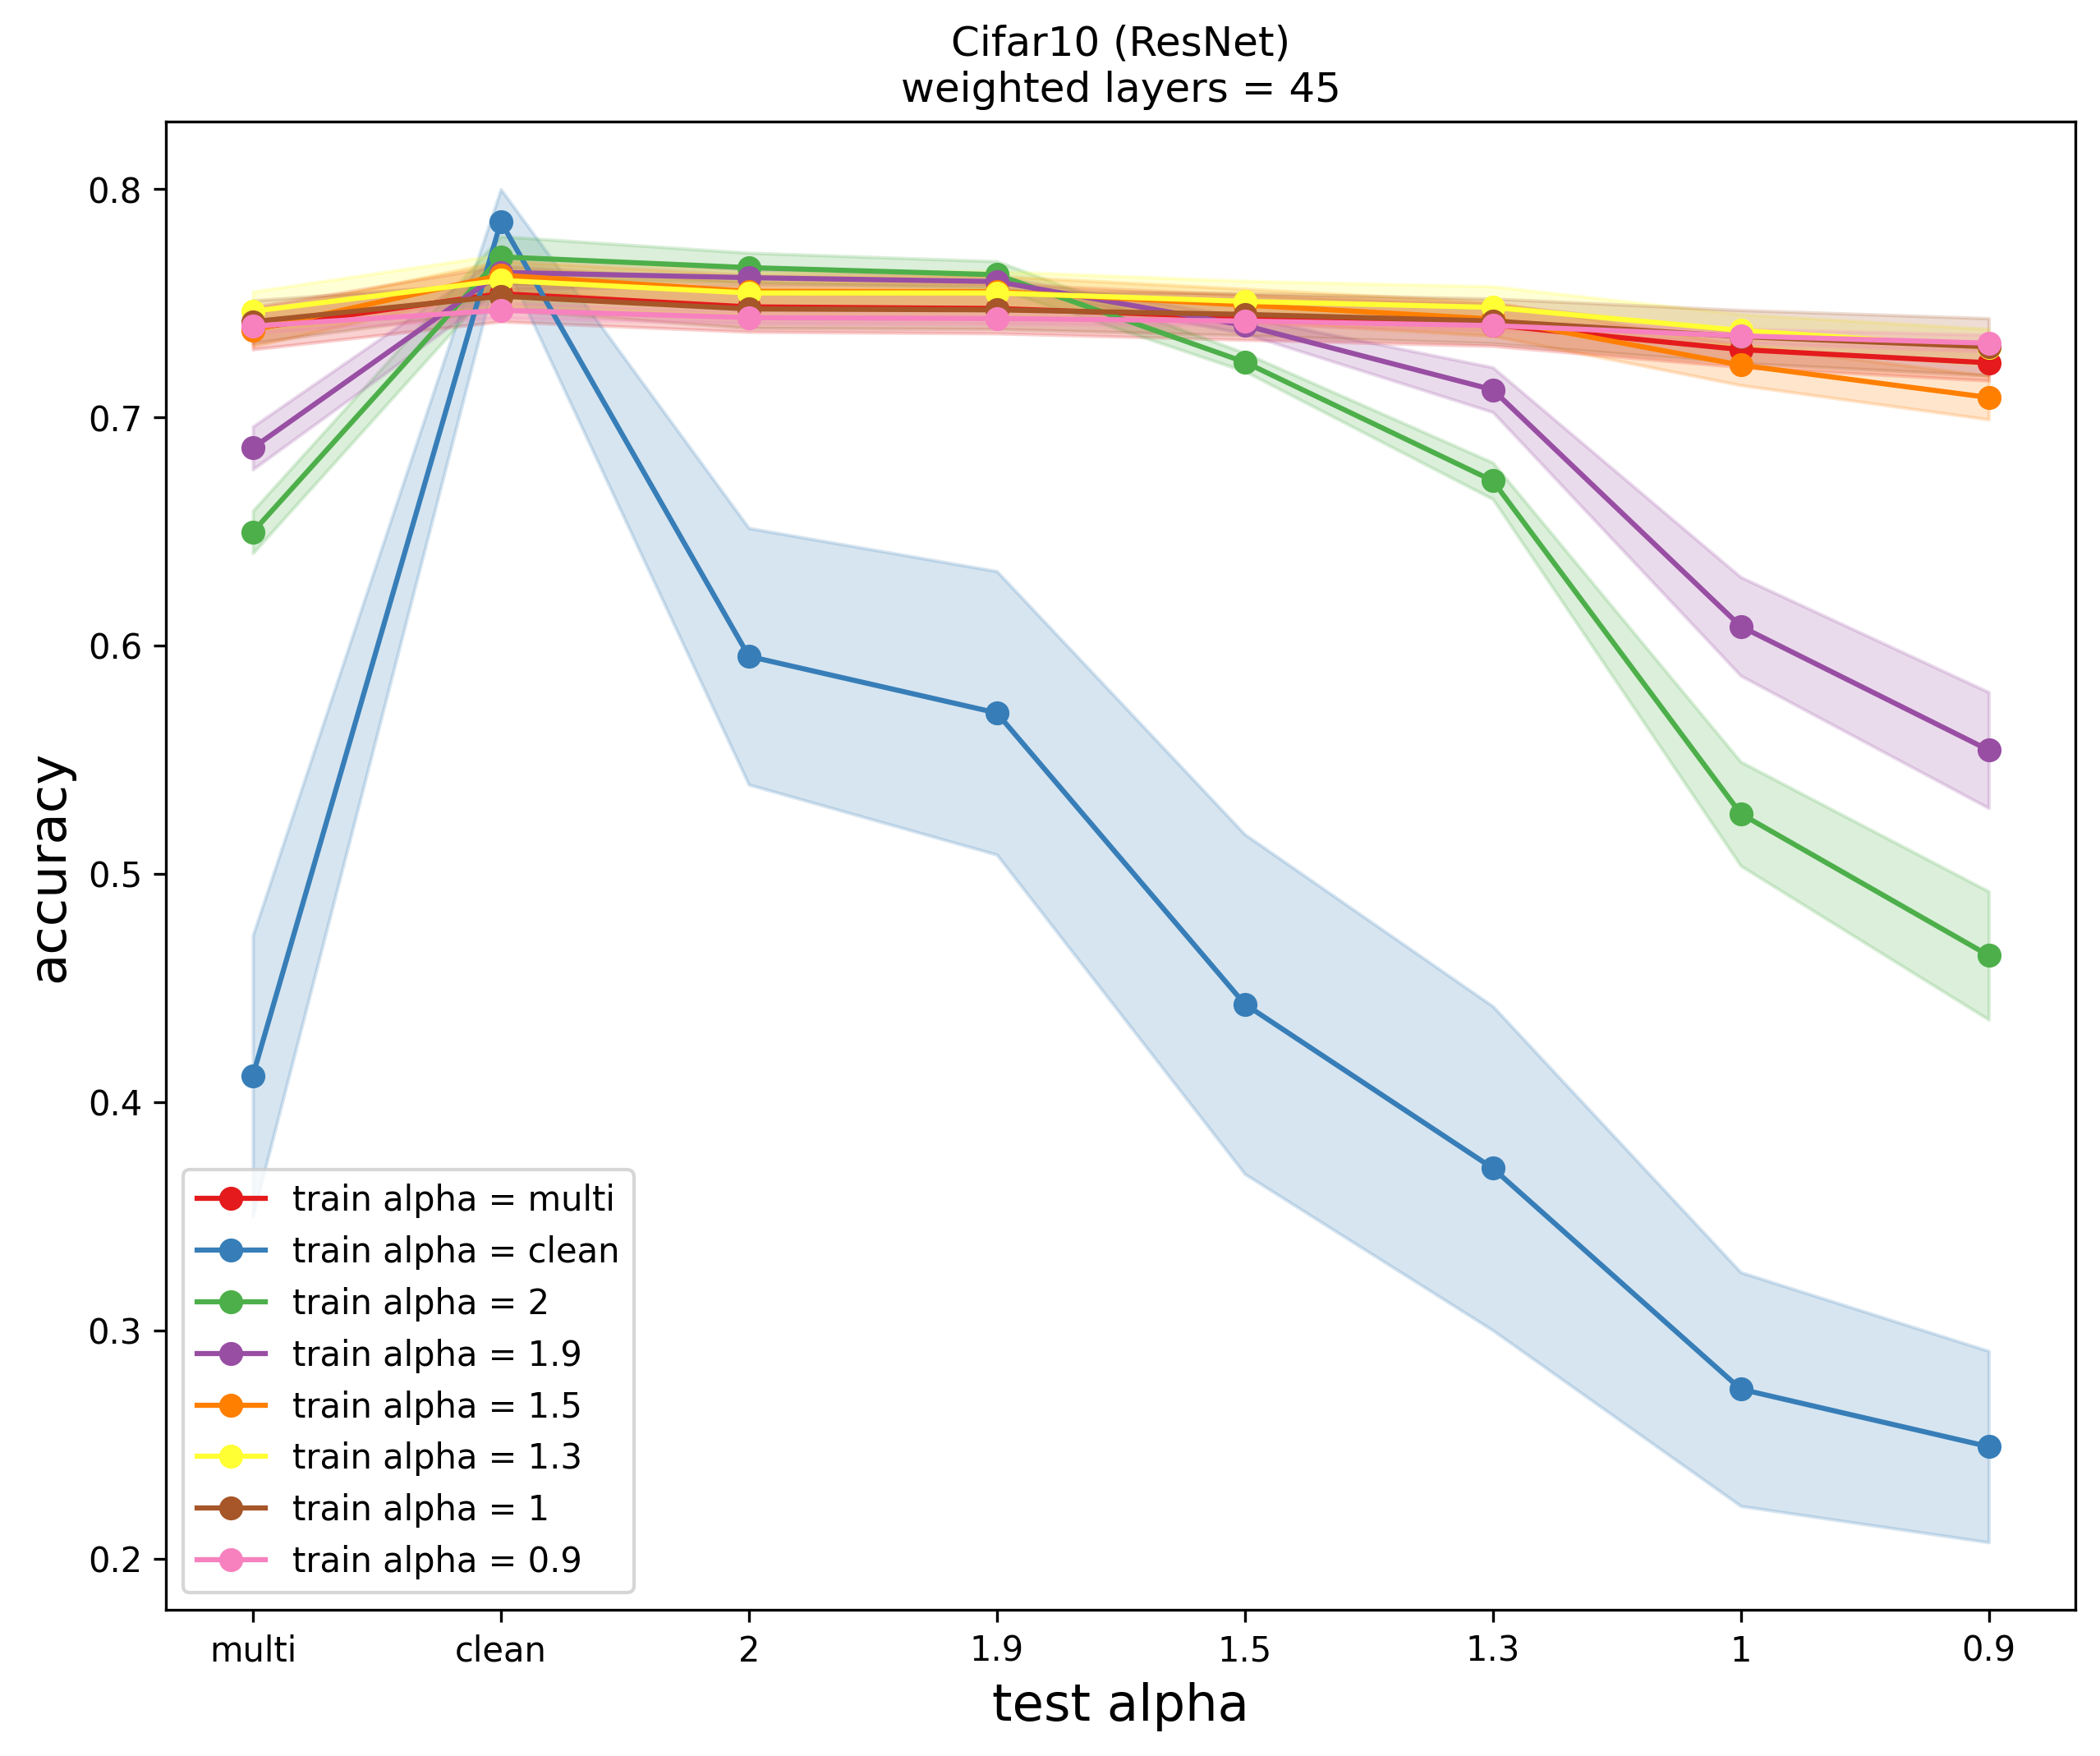

In [11]:
# cifar10画图
summary_acc = pd.DataFrame()
modeltype='resnet'
numres = 7
layer = (1+2*numres)*3
# acc
alphas = [6, 0, 2, 1.9, 1.5, 1.3, 1, 0.9]
palette = pyplot.get_cmap('Set1')
plt.figure(figsize=(10, 8),dpi=300)
i=0
for alpha in alphas:
# for alpha in [1.9]:
    color=palette(i)
    # /home/jipeng/PycharmProjects/robustness-resnet/resnet-numres7/accuracy_alpha1.9_modelresnet_numres7.txt
    acc_path = "/home/jipeng/PycharmProjects/robustness-resnet/resnet_numres{}/accuracy_alpha{}_model{}_numres{}.txt".format(numres,alpha,modeltype,numres)
    print(acc_path)
    if os.path.exists(acc_path) == 0:
        print('no exists, alpha={}'.format(alpha))
    else:
#         f = open(acc_path, 'rb')
#         acc = read(acc_path)
#         df = pd.DataFrame(acc)
        acc = np.loadtxt(acc_path).reshape(5,8)
        df = pd.DataFrame(acc)
        means = np.array(df.mean().round(decimals=4))
        stds = np.array(df.std().round(decimals=4))
        x = ['multi','clean','2', '1.9', '1.5', '1.3', '1', '0.9']
        if alpha == 0:
            alpha = 'clean'
        if alpha == 6:
            alpha = 'multi'
        plt.plot(x,means,'o-',color=color,label='train alpha = {}'.format(alpha))
        plt.fill_between(x, means-stds, means+stds, color=color, alpha=0.2)
        # plt.ylim((0.55, 0.95))
    i=i+1

plt.xlabel("test alpha",fontsize=15)#横坐标名字
plt.ylabel("accuracy",fontsize=15)#纵坐标名字
plt.legend(loc = "best")#图例
plt.title('Cifar10 (ResNet)\nweighted layers = {}'.format(layer))
plt.show()